<a href="https://colab.research.google.com/github/MukeshMishraReloaded/projects/blob/main/Yulu_business_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#YULU BIKES


https://colab.research.google.com/drive/1qlKGQQEzMHcJlfpfSxF5PqQlPtuc0TZF


About Yulu

Yulu is India's leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

**How you can help here?**

**The company wants to know:**

1) Which variables are significant in predicting the demand for shared electric cycles in the Indian market?

2) How well those variables describe the electric cycle demands?

Concept Used:

**Bi-Variate Analysis**

1) 2-sample t-test: testing for difference across populations

2) ANOVA

3) Chi-square

---

**How to begin:**

Import the dataset and do usual exploratory data analysis steps like:

1) Checking the structure & characteristics of the dataset

2) Try establishing a relation between the dependent and independent variable (Dependent “Count” & Independent: Workingday, Weather, Season etc.)

3) Select an appropriate test to check whether:

A) Working Day has effect on number of electric cycles rented

B) No. of cycles rented similar or different in different seasons

C) No. of cycles rented similar or different in different weather

D) Weather is dependent on season (check between 2 predictor variable)

4)

a. Set up Null Hypothesis (H0)

b. State the alternate hypothesis (H1)

5) Check assumptions of the test (Normality, Equal Variance).

6) You can check it using Histogram, Q-Q plot or statistical methods like levene's test, Shapiro-wilk test (optional)

Please continue doing the analysis even If some assumptions fail (levene’s test or Shapiro-wilk test) but double check using visual analysis and report wherever necessary

7) Set a significance level (alpha)

8) Calculate test Statistics.

9) Decision to accept or reject null hypothesis.

10) Inference from the analysis

In [ ]:
#Importing all standard libraries for EDA and hypothesis testing
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
from scipy.stats import chisquare #statistical test
from scipy.stats import chi2
from scipy.stats import chi2_contingency
#numeric vs categorical for many catorgories
from scipy.stats import f_oneway, kruskal, shapiro, ttest_ind, levene, ttest_rel
from statsmodels.graphics.gofplots import qqplot
from statsmodels.distributions.empirical_distribution import ECDF # Empirical CDF

In [ ]:
df_yulu = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089")

**Yulu dataset column profiling:**

datetime: datetime

season: season (1: spring, 2: summer, 3: fall, 4: winter)

holiday: whether day is a holiday or not

workingday: if day is neither weekend nor holiday is 1, otherwise is 0.

weather:

 1: Clear, Few clouds, partly cloudy, partly cloudy

 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp: temperature in Celsius

atemp: feeling temperature in Celsius

humidity: humidity

windspeed: wind speed

casual: count of casual users

registered: count of registered users

count: count of total rental bikes including both casual and registered

In [ ]:
df_yulu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df_yulu.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [ ]:
# Shape of data
df_yulu.shape

(10886, 12)

There are a total of 10886 records in this dataset.

In [ ]:
#Check for duplicates
df_yulu.duplicated().any()

False

There are no duplicate records in this datatset.

In [ ]:
df_yulu.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

There are no NULL values in any of the columns.

In [ ]:
df_yulu['holiday'].unique()

array([0, 1])

In [ ]:
df_yulu['workingday'].unique()

array([0, 1])

In [ ]:
#season
#1: spring,
#2: summer,
#3: fall,
#4: winter
df_yulu['season'].unique()

array([1, 2, 3, 4])

In [ ]:
#weather:
#1: Clear, Few clouds, partly cloudy, partly cloudy
#2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
df_yulu['weather'].unique()

array([1, 2, 3, 4])

In [ ]:
# Time range --> minimum and maximum values in the 'datetime' column
df_yulu['datetime'] = pd.to_datetime(df_yulu['datetime'])
print("Minimum Time: ", df_yulu['datetime'].min())
print("Maximum Time: ", df_yulu['datetime'].max())
df_time = df_yulu
#Add Month and MonthandYear columns to a new dataframe df_time
df_time['Month'] = df_yulu['datetime'].dt.month
df_time['MonthandYear'] = df_yulu['datetime'].dt.to_period('M').astype('string')

Minimum Time:  2011-01-01 00:00:00
Maximum Time:  2012-12-19 23:00:00


# The dataset contains data between 1st Jan 2011 to 19th Dec 2012.

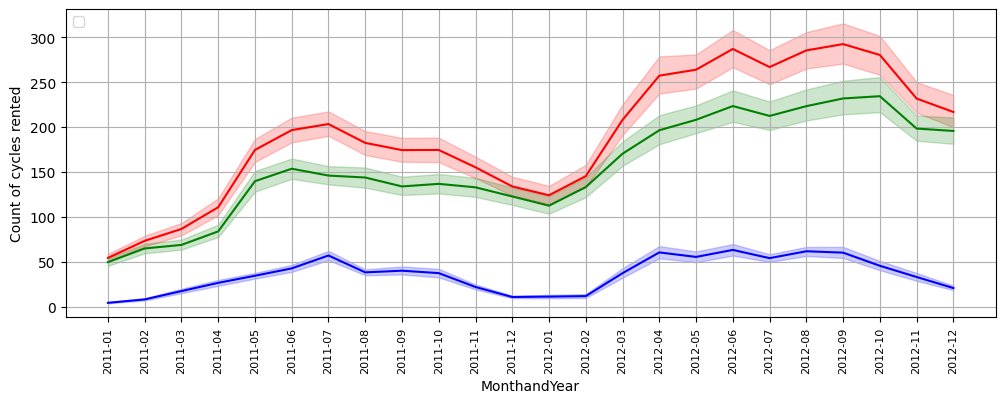

In [ ]:
#Lineplot for time analysis
plt.figure(figsize=(12,4))
plt.legend(["Total Users", "Registered Users", "Casual Users"], loc = 'upper left', frameon = True)
sns.lineplot(data=df_time, x='MonthandYear', y='count', color='r')
sns.lineplot(data=df_time, x='MonthandYear', y='registered', color='g')
sns.lineplot(data=df_time, x='MonthandYear', y='casual', color='b')
plt.xticks(rotation = 90, fontsize = 8)
plt.ylabel("Count of cycles rented" , fontsize = 10)
plt.grid()
plt.show()

# As we can see in the line plot, 'cycles rented' gradually increases from January to mid-year until it peaks in June and July and then it starts falling somewhat towards the end of year till December. We can see some seasonality in demand for Yulu bikes.

In [ ]:
cat_cols= ['season', 'holiday', 'workingday', 'weather']
for col in cat_cols:
    df_yulu[col] = df_yulu[col].astype('object')
df_yulu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datetime      10886 non-null  datetime64[ns]
 1   season        10886 non-null  object        
 2   holiday       10886 non-null  object        
 3   workingday    10886 non-null  object        
 4   weather       10886 non-null  object        
 5   temp          10886 non-null  float64       
 6   atemp         10886 non-null  float64       
 7   humidity      10886 non-null  int64         
 8   windspeed     10886 non-null  float64       
 9   casual        10886 non-null  int64         
 10  registered    10886 non-null  int64         
 11  count         10886 non-null  int64         
 12  Month         10886 non-null  int64         
 13  MonthandYear  10886 non-null  string        
dtypes: datetime64[ns](1), float64(3), int64(5), object(4), string(1)
memory usage: 1.2+ MB

In [ ]:
#Total count by weather
#weather:
#1: Clear, Few clouds, partly cloudy, partly cloudy
#2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

**********CYCLES RENTED IN EACH WEATHER is ******
   weather    count  registered  casual
0        1  1476063     1186163  289900
1        2   507160      419914   87246
2        3   102089       87106   14983
3        4      164         158       6


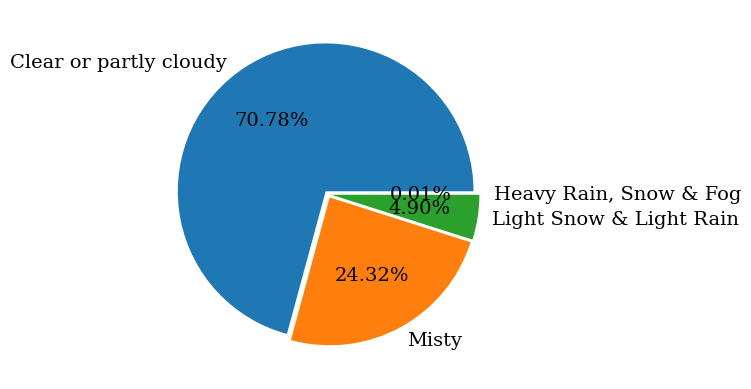

In [ ]:
total_count_by_weather=df_yulu.groupby('weather')[['count', 'registered', 'casual']].sum().reset_index()
print("**********CYCLES RENTED IN EACH WEATHER is ******")
#print(total_count_by_weather)

def weather_mapping(weather):
  if weather == 1:
    return 'Clear or partly cloudy'
  elif weather == 2:
    return 'Misty'
  elif weather == 3:
    return 'Light Snow & Light Rain'
  elif weather == 4:
    return 'Heavy Rain, Snow & Fog'

total_count_by_weather['weather_name'] = total_count_by_weather['weather'].apply(weather_mapping)
#total_count_by_weather=total_count_by_weather.set_index('weather_name')

# Creating the pie-chart
plt.pie(x = total_count_by_weather['count'],
        explode = [0.025, 0.025, 0.025, 0.025],
        labels = total_count_by_weather['weather_name'],
        autopct = '%.2f%%',
        textprops = {'fontsize' : 14,
                 #  'fontstyle' : 'oblique',
                   'fontfamily' : 'serif',
                   'fontweight' : 500})

plt.plot()     # displaying the plot

print(total_count_by_weather[['weather', 'count', 'registered', 'casual']])

# Most cycles are rented when the weather is either "Clear or partly cloudy" or "Misty". Very few cycles are rented when there is light to heavy rain or snow.

********TOTAL COUNT FOR EACH WEATHER is *******
             season   count  registered  casual
season_name                                    
spring            1  312498      270893   41605
summer            2  588282      458610  129672
fall              3  640662      497944  142718
winter            4  544034      465894   78140


[]

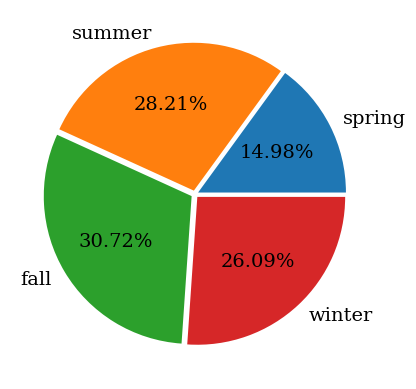

In [ ]:
#Total count by season
total_count_by_season=df_yulu.groupby('season')[['count', 'registered', 'casual']].sum().reset_index()
print("********TOTAL COUNT FOR EACH WEATHER is *******")

def season_mapping(season):
  if season == 1:
    return 'spring'
  elif season == 2:
    return 'summer'
  elif season == 3:
    return 'fall'
  elif season == 4:
    return 'winter'
total_count_by_season['season_name'] = total_count_by_season['season'].apply(season_mapping)
total_count_by_season=total_count_by_season.set_index('season_name')
print(total_count_by_season)

# Creating the pie-chart
plt.pie(x = total_count_by_season['count'],
        explode = [0.025, 0.025, 0.025, 0.025],
        labels = total_count_by_season.index,
        autopct = '%.2f%%',
        textprops = {'fontsize' : 14,
                 #  'fontstyle' : 'oblique',
                   'fontfamily' : 'serif',
                   'fontweight' : 500})

plt.plot()     # displaying the plot

# Insight: Most cycles are rented in Fall followed by Summer, Winter and Spring.

********TOTAL COUNT FOR DAY BEING NOT A WORKING DAY / WORKING DAY is ******
   workingday    count  registered  casual
0           0   654872      448835  206037
1           1  1430604     1244506  186098
            workingday    count  registered  casual
work_day                                           
off_day              0   654872      448835  206037
workingday           1  1430604     1244506  186098


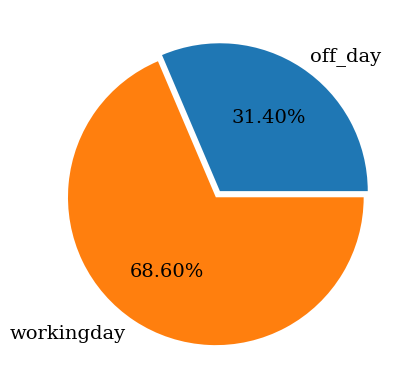

In [ ]:
#Total count by workingday
total_count_by_workingday=df_yulu.groupby('workingday')[['count', 'registered', 'casual']].sum().reset_index()
print("********TOTAL COUNT FOR DAY BEING NOT A WORKING DAY / WORKING DAY is ******")
print(total_count_by_workingday)
def workingday_mapping(workingday):
  if workingday == 1:
    return 'workingday'
  elif workingday == 0:
    return 'off_day'
total_count_by_workingday['work_day'] = total_count_by_workingday['workingday'].apply(workingday_mapping)
total_count_by_workingday=total_count_by_workingday.set_index('work_day')


# Creating the pie-chart
plt.pie(x = total_count_by_workingday['count'],
        explode = [0.025, 0.025],
        labels = total_count_by_workingday.index,
        autopct = '%.2f%%',
        textprops = {'fontsize' : 14,
                 #  'fontstyle' : 'oblique',
                   'fontfamily' : 'serif',
                   'fontweight' : 500})

plt.plot()     # displaying the plot
print(total_count_by_workingday)

# Insight: The share of workingday is much more than off day, but this could be explained as there are more workingdays than off days.

In [ ]:
#Total count by holiday
total_count_by_holiday=df_yulu.groupby('holiday')[['count', 'registered', 'casual']].sum()
print("******TOTAL COUNT FOR THE DAY BEING NOT A HOLIDAY/HOLIDAY is********")
print(total_count_by_holiday)

******TOTAL COUNT FOR THE DAY BEING NOT A HOLIDAY/HOLIDAY is********
           count  registered  casual
holiday                             
0        2027668     1650704  376964
1          57808       42637   15171


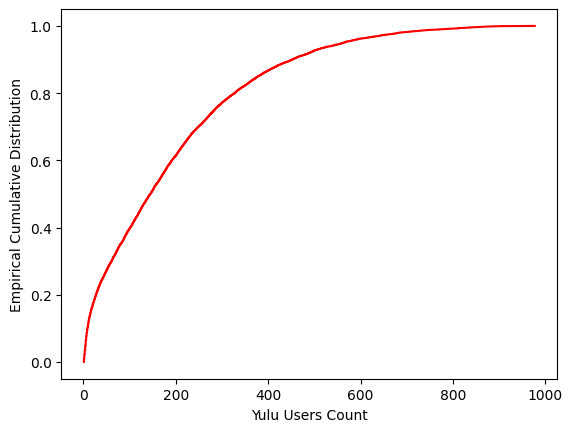

In [ ]:
#ECDF analysis for the purchase amounts from the dataset
e = ECDF(df_yulu['count'])
plt.plot(e.x, e.y, c = "r")
plt.xlabel("Yulu Users Count", fontsize = 10)
plt.ylabel("Empirical Cumulative Distribution", fontsize = 10)
plt.show()

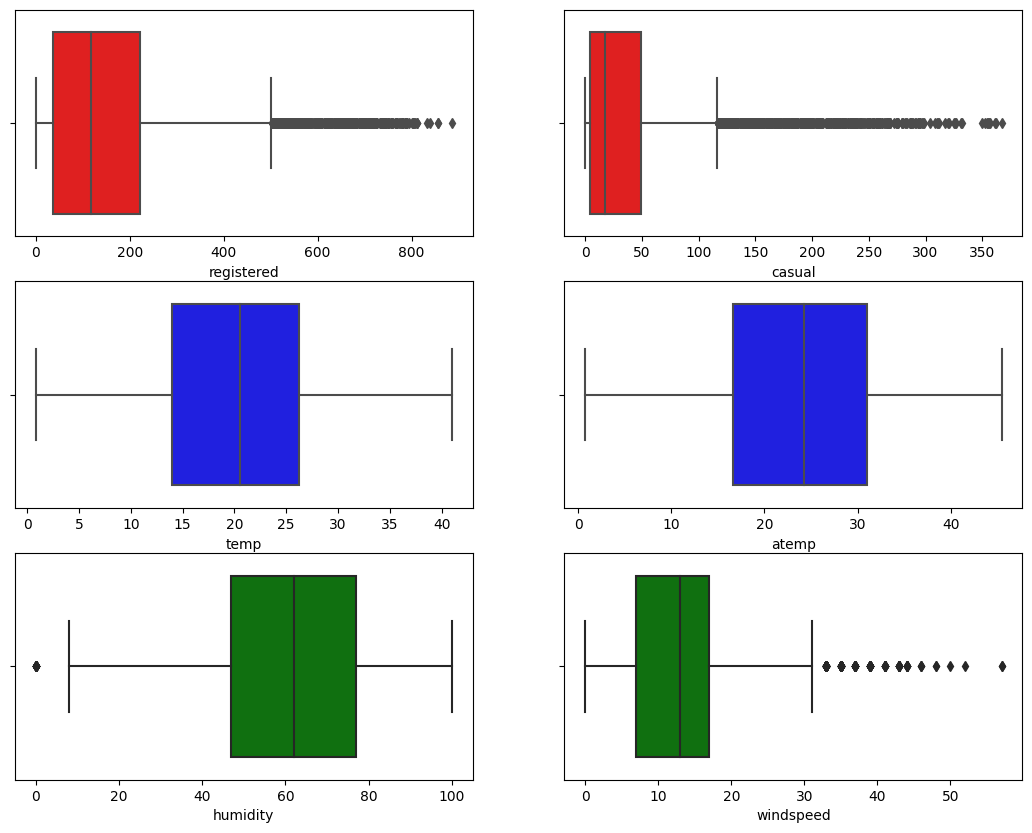

In [ ]:
#Detect outliers using boxplot(Univariate Analysis)
fig, axis= plt.subplots(3, 2, figsize=(13,10))
#sns.boxplot(data=df_yulu, x="count", orient='h', ax=axis[0,0], color='r')
sns.boxplot(data=df_yulu, x="registered", orient='h', ax=axis[0,0], color='r')
sns.boxplot(data=df_yulu, x="casual", orient='h', ax=axis[0,1], color='r')
sns.boxplot(data=df_yulu, x="temp", orient='h', ax=axis[1,0], color='b')
sns.boxplot(data=df_yulu, x="atemp", orient='h', ax=axis[1,1], color='b')
sns.boxplot(data=df_yulu, x="humidity", orient='h', ax=axis[2,0], color='g')
sns.boxplot(data=df_yulu, x="windspeed", orient='h', ax=axis[2,1], color='g')
plt.show()

# **Insight**:

# 1) 'Windspeed' has many outlier values, whereas 'humidity' has a few.

# 2) 'temp' and 'atemp' dont seem to have any outliers.

# 3) 'count', 'registered', 'casual' also have a lot of outlier values.

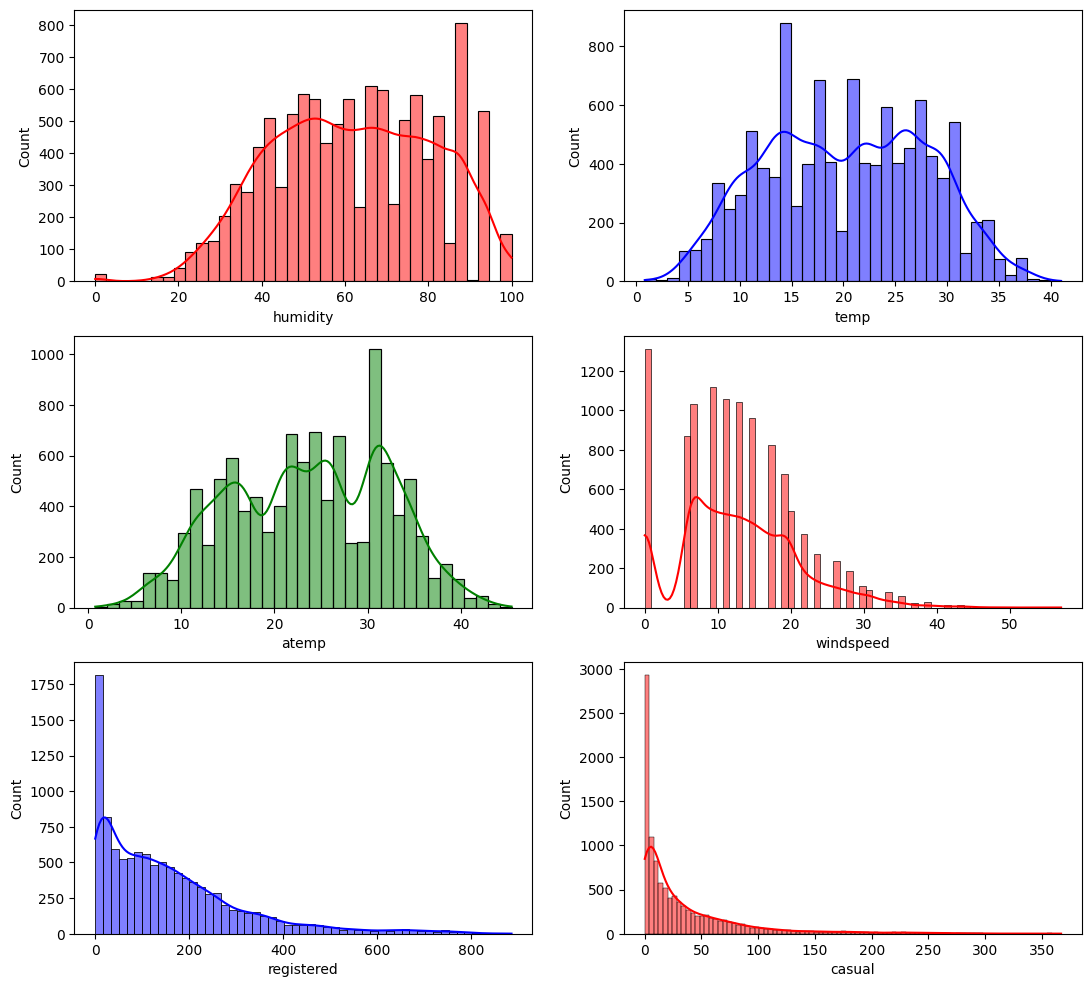

In [ ]:
#Detect outliers using boxplot(Univariate Analysis)
fig, axis= plt.subplots(3, 2, figsize=(13,12))
sns.histplot(df_yulu['humidity'], kde=True, ax=axis[0,0], color='r')
sns.histplot(df_yulu['temp'], kde=True, ax=axis[0,1], color='b')
sns.histplot(df_yulu['atemp'], kde=True, ax=axis[1,0], color='g')
sns.histplot(df_yulu['windspeed'], kde=True, ax=axis[1,1], color='r')
sns.histplot(df_yulu["registered"], kde=True, ax=axis[2,0], color='b')
sns.histplot(df_yulu, x="casual", kde=True, ax=axis[2,1], color='r')
plt.show()

# INSIGHT:
# 1) Neither 'registered' or 'casual' users data follow gaussian distribution.
# 2) 'humidity' or 'temp' follow somewhat of a typical distribution, although they too can't be considered normal just by looking at the visual charts.

In [ ]:
#Divide the dataset into categorical and numerical values
cat_cols= ['season', 'holiday', 'workingday', 'weather']
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered','count']

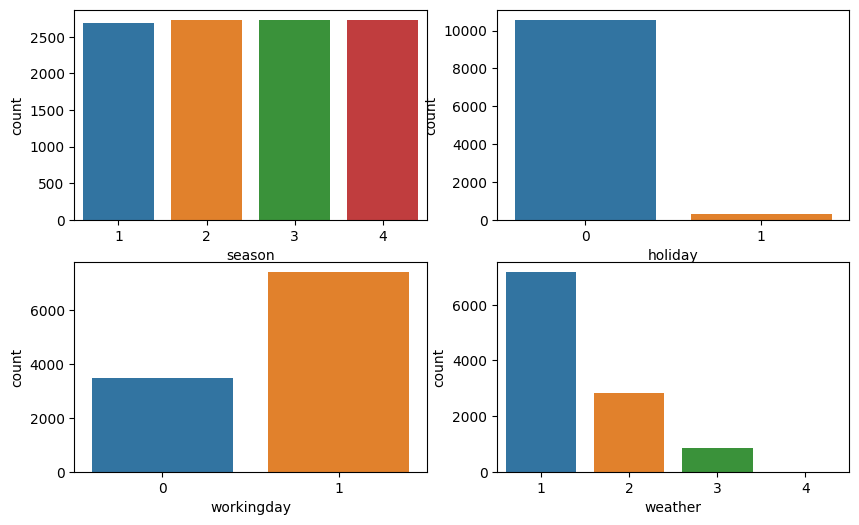

In [ ]:
# countplot for each categorical column
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

idx = 0
for row in range(2):
    for col in range(2):
        sns.countplot(data=df_yulu, x=cat_cols[idx], ax=axis[row, col])
        idx += 1

plt.show()

# 1) Non-holiday and workingday contribute a lot to users renting Yulu bikes.

# 2) A very high number of cycles are rented when the weather is 'Clear Sky or partially cloudy'.

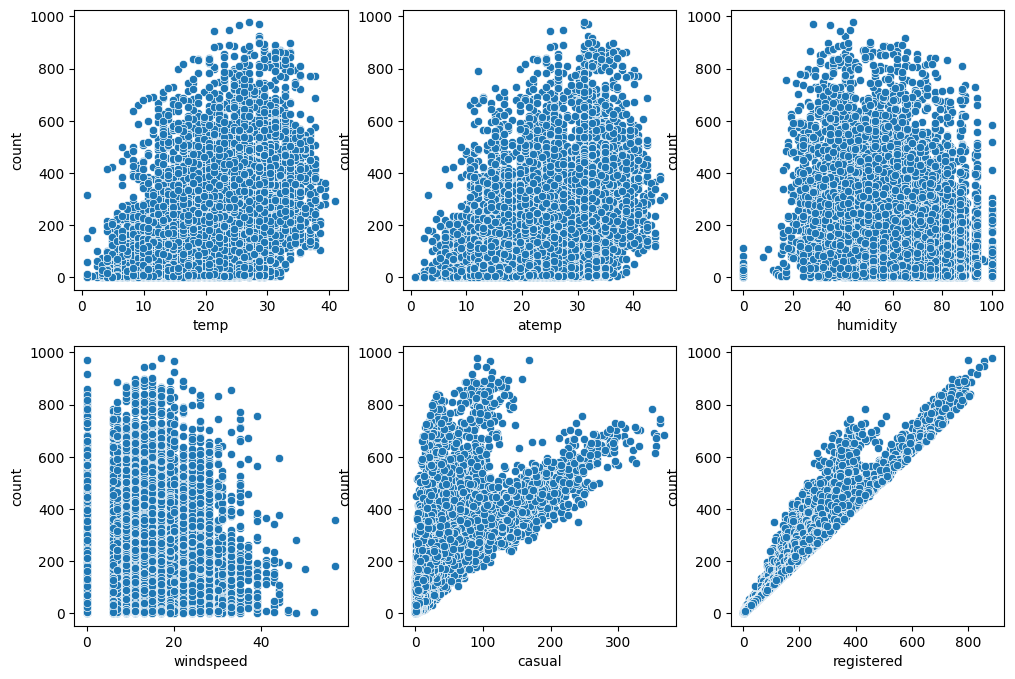

In [ ]:
#Scatter plot for numerical values
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
index = 0
for row in range(2):
    for col in range(3):
        sns.scatterplot(data=df_yulu, x=num_cols[index], y='count', ax=axis[row, col])
        index += 1
plt.show()

# 1) When the temperature is less than 10 or more than 40, the number of bikes rented is low.
# 2) When the humidity is less than 20 or more than 100, the number of bikes rented is pretty low.
# 3) When the windspeed is greater than 35-40, the number of bikes rented is pretty low.



# Ques: Does workingday have an impact on cycles rented?

In [ ]:
#H0: Workingday has no impact on the number of cycles rented.
#Ha: Workingday does have an impact on the number of cycles rented.

data1 = df_yulu[df_yulu['workingday']==0]['count'].values
data2 = df_yulu[df_yulu['workingday']==1]['count'].values

t_stat, p_value = ttest_ind(data1, data2)
print("p_value is: ", p_value)

alpha = 0.05
if p_value < alpha:
  print("Reject the null hypothesis(H0).")
  print("Workingday has an impact on the number of cycles rented!")
else:
  print("Failed to reject the null hypothesis.")
  print("Workingday has no impact on the number of cycles rented!")

p_value is:  0.22644804226361348
Failed to reject the null hypothesis.
Workingday has no impact on the number of cycles rented!


# Insight: As there are 2 categories, we will use ttest_ind as the hypothesis test to validate this proposition. On running this test, we find that there is no clear association between workingday and renting of bikes, as we couldn't reject the null hypothesis (H0).

# Is the number of cycles rented is similar or different in different season ?

In [ ]:
#Number of cycles rented is similar or different in different seasons.
df_yulu.groupby('season')['count'].describe()

count        mean         std  min   25%    50%    75%    max
season                                                                
1       2686.0  116.343261  125.273974  1.0  24.0   78.0  164.0  801.0
2       2733.0  215.251372  192.007843  1.0  49.0  172.0  321.0  873.0
3       2733.0  234.417124  197.151001  1.0  68.0  195.0  347.0  977.0
4       2734.0  198.988296  177.622409  1.0  51.0  161.0  294.0  948.0

Reject H0
The data doesn't follow Gaussian distribution
Reject H0
The data doesn't follow Gaussian distribution
Reject H0
The data doesn't follow Gaussian distribution
Reject H0
The data doesn't follow Gaussian distribution


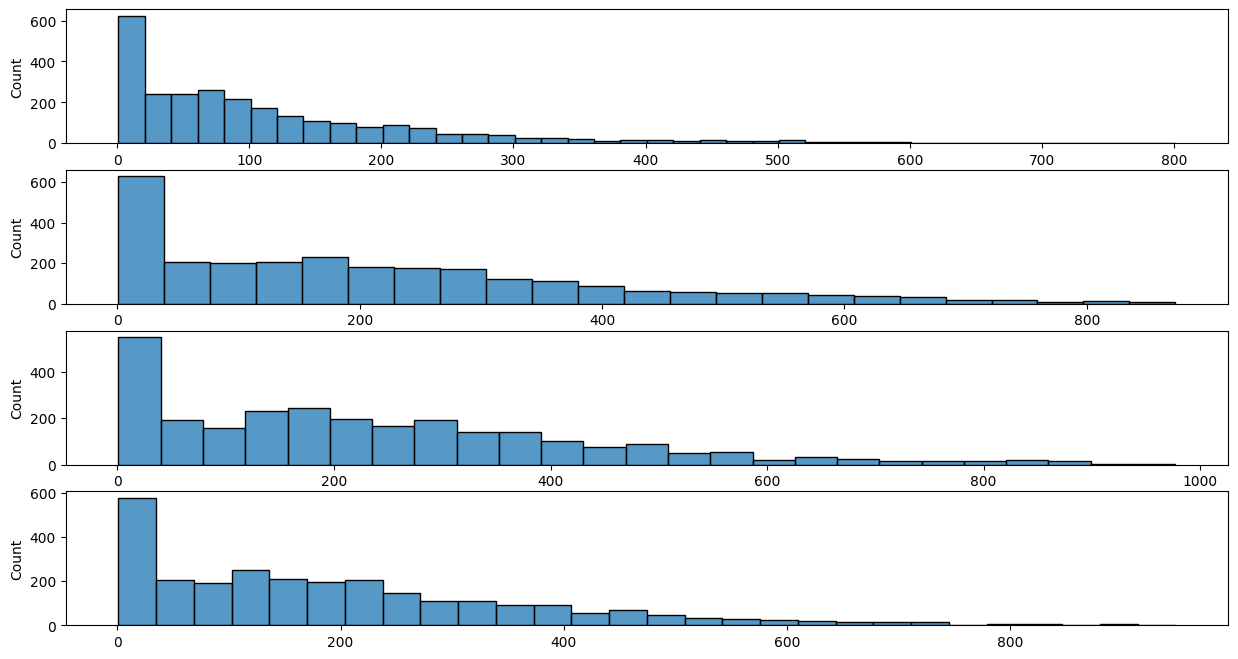

In [ ]:
#H0: Data is Gaussian
#Ha: Data is not Guassian
data=[]
season=[1, 2, 3, 4]
fig, axis = plt.subplots(nrows=4, ncols=1, figsize=(15, 8))
for idx in range(len(season)):
  test_stat = 0
  p_value = 0
  data.clear()
  data.extend(df_yulu[df_yulu['season'] == idx+1]['count'].values)
  #print(data)
  test_stat, p_value = shapiro(data)
  if p_value < 0.05:
    print("Reject H0")
    print("The data doesn't follow Gaussian distribution")
  else:
    print("Fail to reject H0")
    print("The data follows Gaussian distribution")
  sns.histplot(data=data, ax=axis[idx])

# Insight: Shapiro Test: The data for different seasons doesn't follow normal distribution.

In [ ]:
#H0: Variances are equal
#Ha: Variances are not equal

data1 = df_yulu[df_yulu['season']==1]['count'].values
data2 = df_yulu[df_yulu['season']==2]['count'].values
data3 = df_yulu[df_yulu['season']==3]['count'].values
data4 = df_yulu[df_yulu['season']==4]['count'].values

k_stat, p_value = levene(data1, data2, data3, data4)
print(p_value)
if p_value < 0.05:
  print("Reject H0")
  print("Variance are not equal")
else:
  print("Fail to reject H0")
  print("Variance are equal")

1.0147116860043298e-118
Reject H0
Variance are not equal


# Insight: Levene Test: Data for different seasons have different variance.

In [ ]:
#Does season have an impact on cycles rented? (More than 2 categories)
#H0: Season has no impact on the number of cycles rented.
#Ha: Season does have an impact on the number of cycles rented.

data1 = df_yulu[df_yulu['season']==1]['count'].values
data2 = df_yulu[df_yulu['season']==2]['count'].values
data3 = df_yulu[df_yulu['season']==3]['count'].values
data4 = df_yulu[df_yulu['season']==4]['count'].values

k_stat, p_value = kruskal(data1, data2, data3, data4)

print(p_value)

alpha = 0.05
if p_value < alpha:
  print("Reject the null hypothesis(H0).")
  print("Season has an impact on the number of cycles rented!")
else:
  print("Failed to reject the null hypothesis")
  print("Season has no impact on the number of cycles rented!")

2.479008372608633e-151
Reject the null hypothesis(H0).
Season has an impact on the number of cycles rented!


In [ ]:
#Anova Test
f_stat, p_value = f_oneway(data1, data2, data3, data4)

print(p_value)

alpha = 0.05
if p_value < alpha:
  print("Reject the null hypothesis(H0).")
  print("Season has an impact on the number of cycles rented!")
else:
  print("Failed to reject the null hypothesis")
  print("Season has no impact on the number of cycles rented!")

6.164843386499654e-149
Reject the null hypothesis(H0).
Season has an impact on the number of cycles rented!


# Insight: As the data doesn't follow normal distribution, and the variance for different seasons is different, therefore, we cannot apply Annova Test. In such cases, we apply Kruskal Wallis test. On applying k-test, we find that season indeed has an impact on renting of bikes.

#Is the number of cycles rented is similar or different in different weather ?

In [ ]:
#Is the number of cycles rented is similar or different in different weather ?
df_yulu.groupby('weather')['count'].describe()

count        mean         std    min    25%    50%    75%    max
weather                                                                   
1        7192.0  205.236791  187.959566    1.0   48.0  161.0  305.0  977.0
2        2834.0  178.955540  168.366413    1.0   41.0  134.0  264.0  890.0
3         859.0  118.846333  138.581297    1.0   23.0   71.0  161.0  891.0
4           1.0  164.000000         NaN  164.0  164.0  164.0  164.0  164.0

In [ ]:
#H0: Data is Gaussian
#Ha: Data is not Guassian
data=[]
weather=[1, 2, 3, 4]
for idx in range(len(weather)):
  test_stat = 0
  p_value = 0
  data.clear()
  data.extend(df_yulu[df_yulu['weather'] == idx+1]['count'].values)
  #print(data)
  if len(data) >= 3:
    test_stat, p_value = shapiro(data)
    if p_value < 0.05:
      print("Reject H0")
      print("The data doesn't follow Gaussian distribution")
    else:
      print("Fail to reject H0")
      print("The data follows Gaussian distribution")


Reject H0
The data doesn't follow Gaussian distribution
Reject H0
The data doesn't follow Gaussian distribution
Reject H0
The data doesn't follow Gaussian distribution


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


# Insight: Shapiro Test: The data for different weathers doesn't follow normal distribution.

In [ ]:
#H0: Variances are equal
#Ha: Variances are not equal

data1 = df_yulu[df_yulu['weather']==1]['count'].values
data2 = df_yulu[df_yulu['weather']==2]['count'].values
data3 = df_yulu[df_yulu['weather']==3]['count'].values
data4 = df_yulu[df_yulu['weather']==4]['count'].values

k_stat, p_value = levene(data1, data2, data3, data4)
print(p_value)
if p_value < 0.05:
  print("Reject H0")
  print("Variance are not equal")
else:
  print("Fail to reject H0")
  print("Variance are equal")

3.504937946833238e-35
Reject H0
Variance are not equal


# Levene Test: Data for different weathers have different variance.

In [ ]:
#Does weather have an impact on cycles rented? (More than 2 categories)
#H0: Weather has no impact on the number of cycles rented.
#Ha: Weather does have an impact on the number of cycles rented.

data1 = df_yulu[df_yulu['weather']==1]['count'].values
data2 = df_yulu[df_yulu['weather']==2]['count'].values
data3 = df_yulu[df_yulu['weather']==3]['count'].values
data4 = df_yulu[df_yulu['weather']==4]['count'].values

k_stat, p_value = kruskal(data1, data2, data3, data4)

print(p_value)

alpha = 0.05
if p_value < alpha:
  print("Reject the null hypothesis(H0).")
  print("Weather has an impact on the number of cycles rented!")
else:
  print("Failed to reject the null hypothesis")
  print("Weather has no impact on the number of cycles rented!")

3.501611300708679e-44
Reject the null hypothesis(H0).
Weather has an impact on the number of cycles rented!


In [ ]:
#Anova Test
f_stat, p_value = f_oneway(data1, data2, data3, data4)

print(p_value)

alpha = 0.05
if p_value < alpha:
  print("Reject the null hypothesis(H0).")
  print("Weather has an impact on the number of cycles rented!")
else:
  print("Failed to reject the null hypothesis")
  print("Weather has no impact on the number of cycles rented!")

5.482069475935669e-42
Reject the null hypothesis(H0).
Weather has an impact on the number of cycles rented!


# Insight: As the data doesn't follow normal distribution, and variance of different weather categories also varies, we need to apply Kruskal Wallis Test instead of Annova test. On running k-test, we find that weather does have an impact on renting of bikes.


# Is weather dependent on season?

In [ ]:
# Is Weather dependent on season (CAT-CAT analysis) ?
#H0: There is no dependence between weather and season.
#Ha: There is a dependence between weather and season.

matrix = pd.crosstab(df_yulu['season'], df_yulu['weather'])
chi_stat, p_value, dof , expected_freq = chi2_contingency(matrix)
print(chi_stat)
print(p_value)
print(dof)
print(expected_freq)

alpha=0.05
if p_value < alpha:
  print("Reject H0")
  print("There is indeed a relation between season and weather!")
else:
  print("Fail to reject H0")
  print("There is no dependence between weather and season")

49.158655596893624
1.549925073686492e-07
9
[[1.77454639e+03 6.99258130e+02 2.11948742e+02 2.46738931e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80625831e+03 7.11754180e+02 2.15736359e+02 2.51148264e-01]]
Reject H0
There is indeed a relation between season and weather!


# Insight: This is a type of cat-cat analysis, hence we use chi2_contingency test. On running this test, we conclude that there is a statistically significant evidence to support dependence between season and weather.

[]

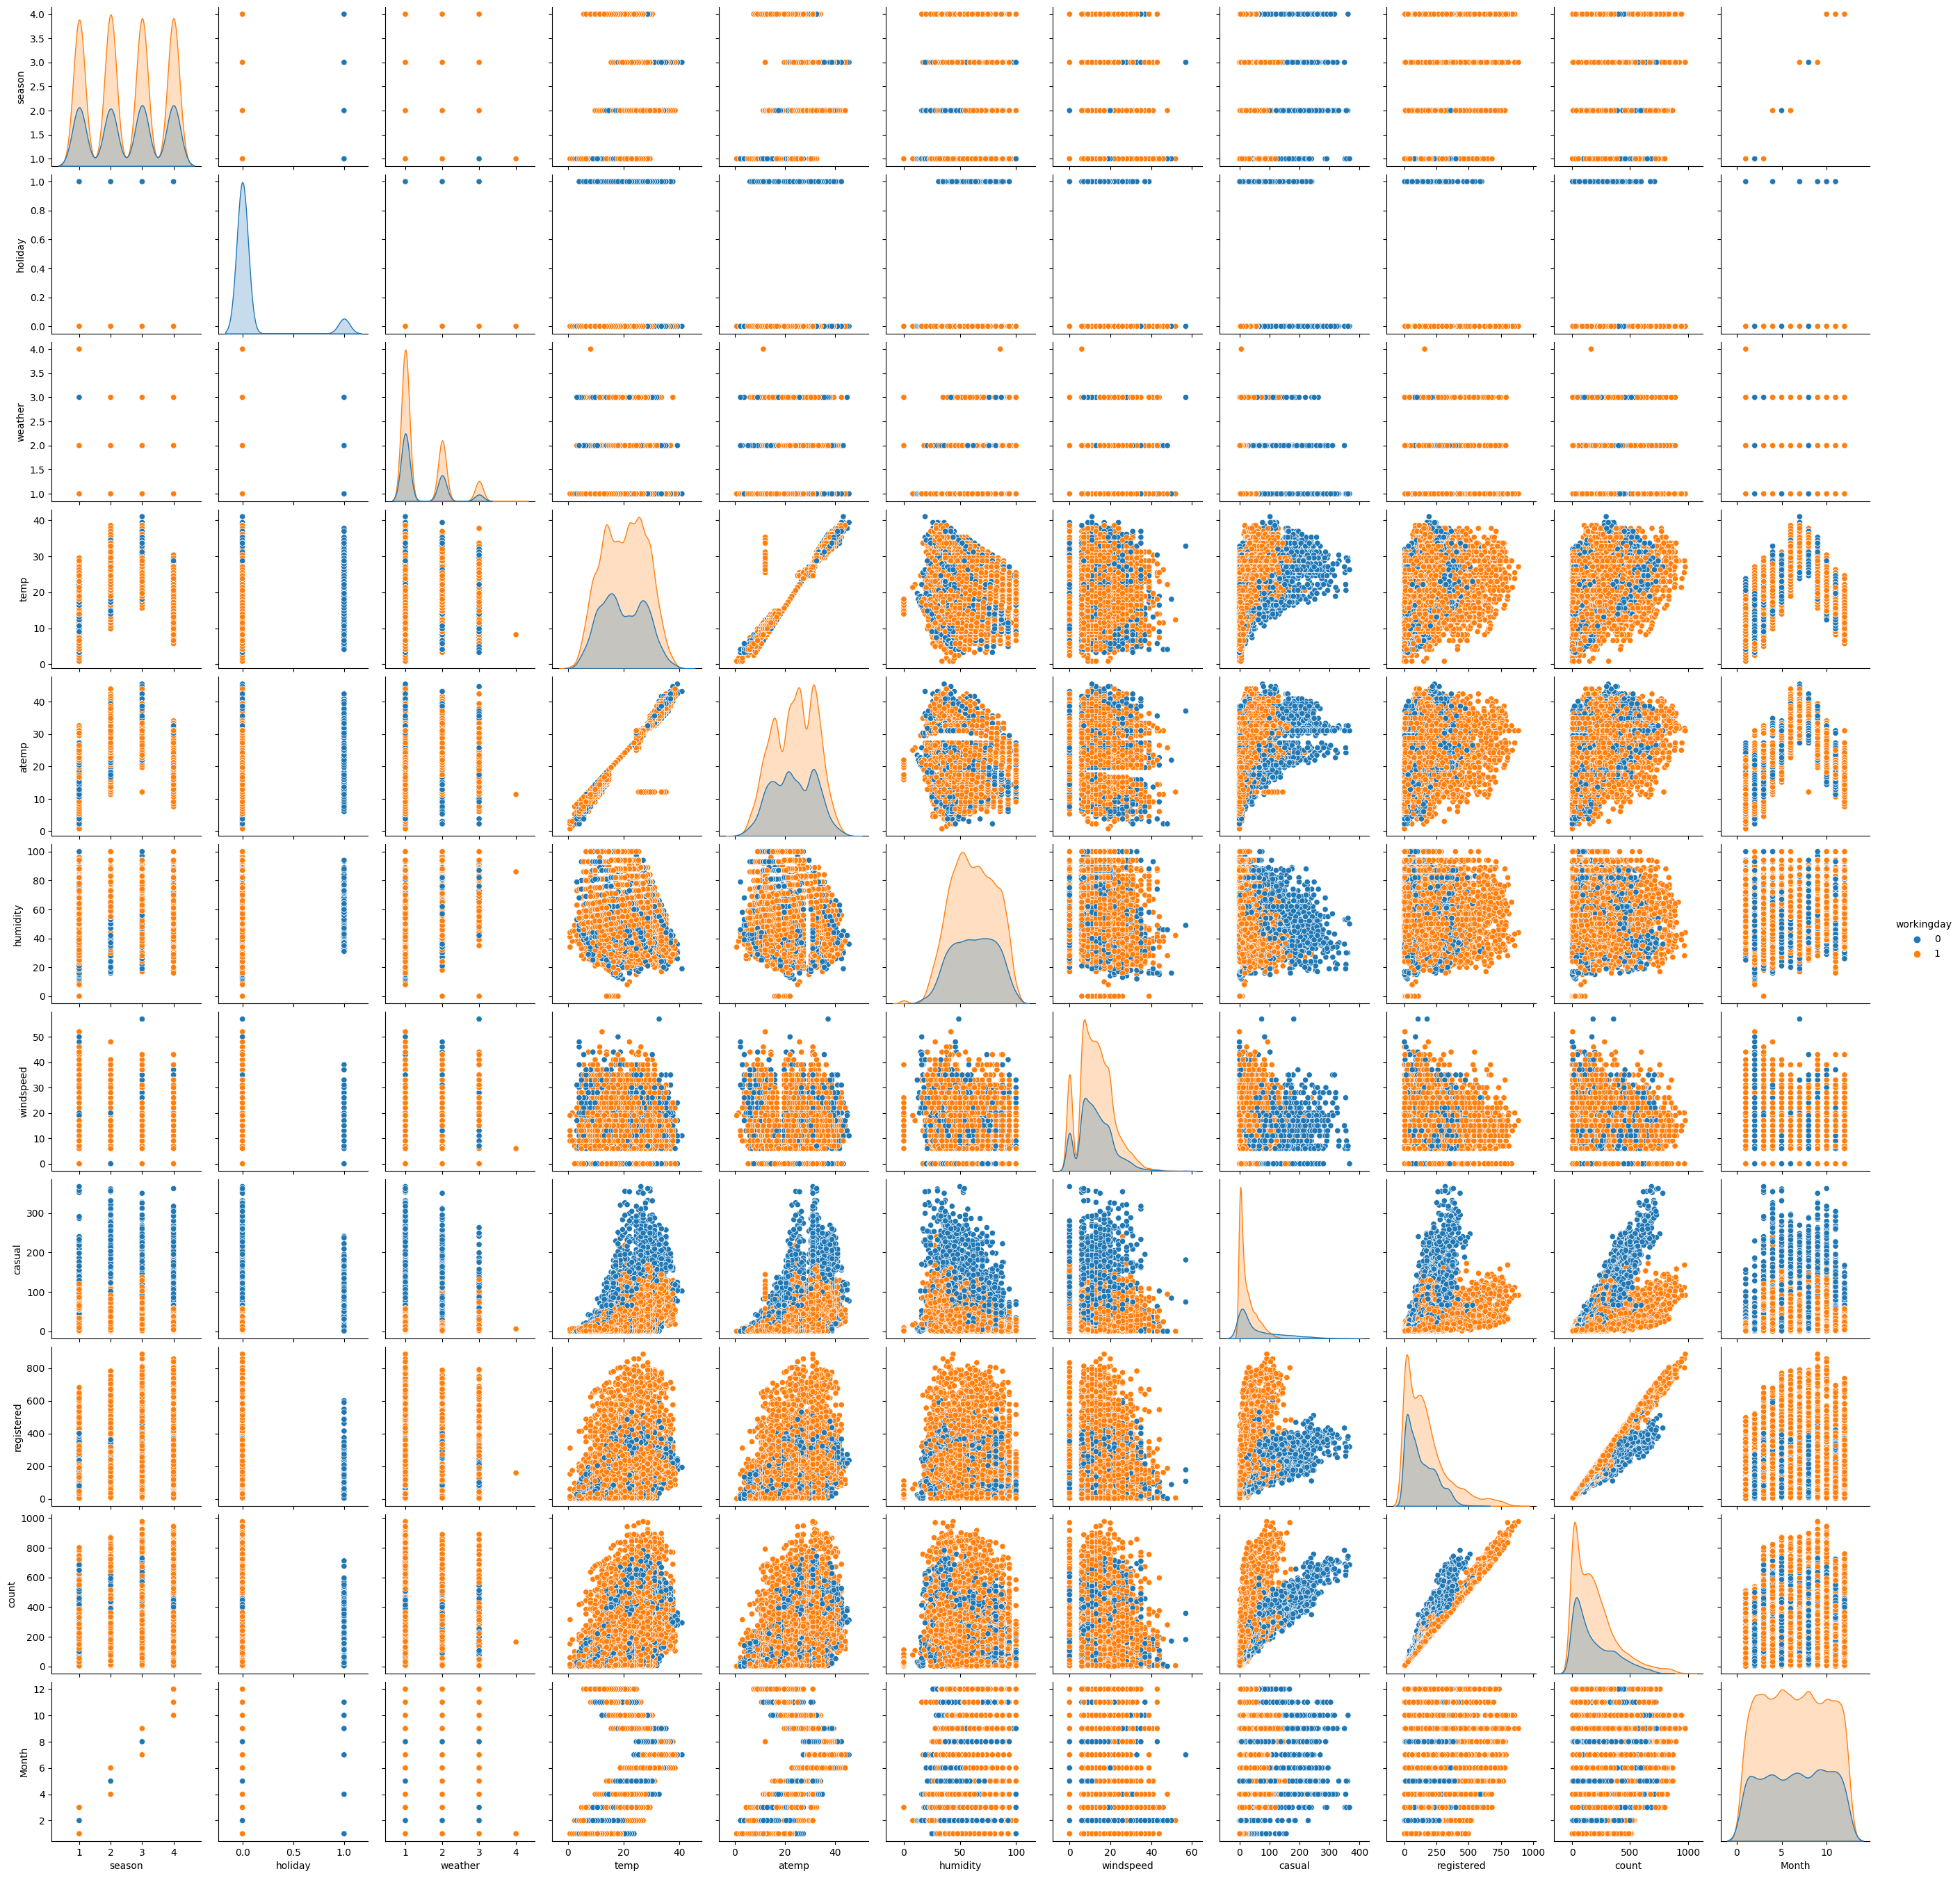

In [ ]:
#Correlation / pairplot
sns.pairplot(data = df_yulu, hue = "workingday")
plt.plot()

<ipython-input-38-4dbf700546d9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_yulu.corr(), annot = True, cmap = "Blues")


[]

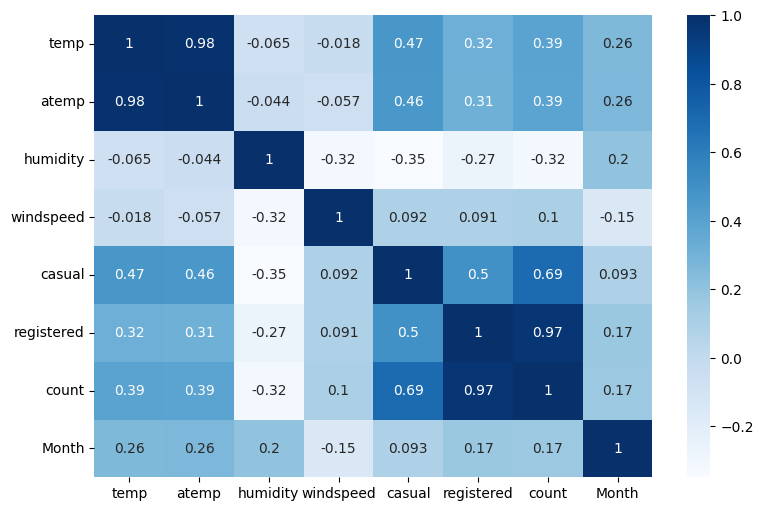

In [ ]:
plt.figure(figsize = (9, 6))
sns.heatmap(df_yulu.corr(), annot = True, cmap = "Blues")
plt.plot()

# Insights:

1) Medium correlation exists between temp, atemp and count / registered / casual users count.

2) Very low to negative correlation exists between humidity and count / registered / casual users count.

3) Windspeed has pretty low correlation with count / registered / casual users count.

#Business Insights

1) Fall and summer are the best seasons for Yulu bikes, followed by winter and spring.

2) Whenever the weather is clear or partially cloudy, a significantly more number of Yulu bikes are rented compared to when there is a light rain or snow.

3) Holiday or workingday do not have statistically significant impact on renting of bikes.

4) Whenever there is rain, thunderstorm, snow or fog, the number of bikes being rented goes down.

5) When the temperature is less than 10 or more than 40, the number of bikes rented is low.

6) When the humidity is less than 20 or more than 100, the number of bikes rented is pretty low.

7) When the 'windspeed' is greater than 35-40, the number of bikes rented is pretty low.

8) With the available data for 2011 & 2012, what we can see a pattern/seasonality in the demand for Yulu bikes. Renting of Yulu bikes is quite low in January and it starts rising thereafter hitting the peak in June/July and from thereon it starts falling slightly until end of the year / December.

# Recommendations:

1) Based on the historical demand data, more bikes must be made available in Fall & Summer compared to Winter or Spring in general.

2) If the weather is light to heavy rain or snow, the availability of bikes must be reduced accordingly.

3) Given the constant spike & fall in demand, it makes sense for Yulu to work in different cities and also work with partners.

4) Holidays and non-working days should be treated like business as usual. There is not statistically significant evidence to prove a change in demand in either direction on these days.

5) More bikes must be made available when the weather is good. Demand planning must be linked to the weather forecast. On days, when the sky is clear or partially cloudy, Yulu can expect good demand, and on other days it will be relatively lower.

6) If the temperature, humidity and windspeed are outside generally accepted limits (See the business insights), the demand is expected to scale down significantly, so this must also be taken into account during demand prediction and planning.

7) In order to boost sales, Yulu should offer promotional discounts when the humidity is high and temperatures are low / high.

8) A major share of the wallet comes from 'registered' users. It is approximately 80-20 split in terms of usage statistics. Therefore, it makes sense to further analyze the casual users data, including their routes & other usage preferences. Based on this, Yulu can run marketing / promotional campaign to win them over to register with the biking platform.